In [1]:
import dipy

In [2]:
from dipy.io.image import load_nifti, save_nifti
from dipy.io.gradients import read_bvals_bvecs

In [3]:
from fenics import *
from mshr import *
from math import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [4]:
fname = 'dMRI_data/ss-ras_data.nii.gz' 
bval_fname = 'dMRI_data/ss-ras.bval' 
bvec_fname = 'dMRI_data/ss-ras.bvec'

data, affine = load_nifti(fname)
bvals, bvecs = read_bvals_bvecs(bval_fname, bvec_fname)
print('data.shape (%d, %d, %d, %d)' % data.shape)

data_float = data.astype(np.float32)

dataMaxVal = int(max(data.flatten()))
dataMinVal = int(min(data.flatten()))

print('b values: ', bvals)
print('b vectors: ', bvecs)

data.shape (104, 104, 72, 32)
b values:  [  0. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700. 700. 700. 700.   0. 700. 700. 700. 700. 700. 700.
 700. 700. 700. 700.]
b vectors:  [[ 0.          0.          0.        ]
 [ 0.22293058 -0.49968055 -0.83703119]
 [-0.17871778 -0.49333411 -0.85128242]
 [-0.37542525 -0.14225766 -0.91587037]
 [ 0.41157657 -0.72193778 -0.556247  ]
 [ 0.19853516 -0.93616748 -0.29012811]
 [ 0.84751403 -0.52907634 -0.04240569]
 [ 0.73912424 -0.51868695 -0.42972025]
 [ 0.43850514 -0.15385152 -0.88546205]
 [ 0.75664991 -0.17243032 -0.63067305]
 [ 0.62896943 -0.74815804  0.21132247]
 [ 0.30347744 -0.94898587  0.0855993 ]
 [ 0.28489485 -0.54959691  0.78535217]
 [ 0.62077832 -0.54730117  0.56133366]
 [ 0.97062433 -0.19699152  0.13814011]
 [ 0.83273727 -0.20222756  0.51541471]
 [-0.03439669 -0.75075191  0.65968806]
 [-0.02572841 -0.94997877  0.31125325]
 [-0.68088585 -0.5256443   0.50999278]
 [-0.36761704 -0.53581387  0.76010603]
 [-

In [5]:
# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

In [6]:
# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

In [7]:
def boundary(x, on_boundary):
    return on_boundary

In [8]:
bc = DirichletBC(V, u_D, boundary)

In [9]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

In [10]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

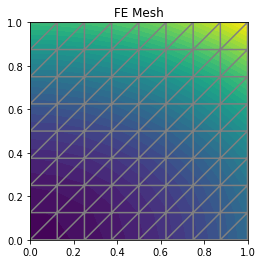

In [11]:
# Plot solution and mesh
plot(u, title='FE Solution')
plot(mesh, title='FE Mesh')

In [12]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [13]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

In [14]:
# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
import numpy as np
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

In [15]:
# Print errors
print('error_L2 =', error_L2)
print('error_max =', error_max)

error_L2 = 0.008235098073354827
error_max = 1.3322676295501878e-15


In [16]:
# Hold plot
#interactive()
plt.show()

In [17]:
array_u = nodal_values_u = u.vector()
vertex_values_u = u.compute_vertex_values()

In [18]:
type(nodal_values_u)

dolfin.cpp.la.PETScVector

In [19]:
len(nodal_values_u)

81

In [20]:
len(vertex_values_u)

81

In [21]:
print(nodal_values_u[80])

2.0


In [22]:
print(vertex_values_u[80])

4.0


In [52]:
center = Point()
sphere = Sphere(center,1)
mesh = generate_mesh(sphere,20) # 20 specify the resolution of the mesh

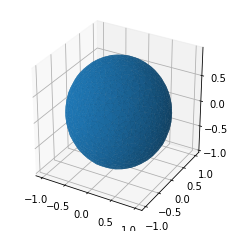

In [54]:
plot(mesh)

In [60]:
V = FunctionSpace(mesh, "CG", 1)
u = TrialFunction(V) 
v = TestFunction(V)
w = Function(V)      
lamb = .6       
r = Expression("x[0]", degree=1)
phi = Expression("x[1]", degree=1)
theta = Expression("x[2]", degree=1)
#f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
f = Constant(0.0)
a = (Dx(u,0)*Dx(v,0) + (Constant(1.)/r)**2*Dx(u,1)*Dx(v,1) + Constant(1.)/(r*sin(phi))**2*Dx(u,2)*Dx(v,2))*dx
#L = inner(f,v)*dx
L = Constant(0)
solve(a == L, w)

TypeError: Expression.__float__ returned non-float (type NotImplementedType)

In [49]:
V = FunctionSpace(mesh, "CG", 1)
u = TrialFunction(V) 
v = TestFunction(V)
w = Function(V)      
lamb = .6       

r, phi, theta = SpatialCoordinate(mesh)
x = r * sin(theta) * cos(phi)

f = Expression("lamb*(lamb + 1)*(sin(x[2]))**lamb*sin(lamb*x[1])", lamb=lamb) 
#f = Constant(0.0)
a = ( Dx(u,0)*Dx(v,0) + 1/x[0]**2*Dx(u,1)*Dx(v,1) + 1/(x[0]*sin(x[1]))**2*Dx(u,2)*Dy(v,2) )*dx
L = inner(f,v)*dx
solve(a == L, w)

TypeError: Indexed.__float__ returned non-float (type NotImplementedType)